2.3.1.1. Загрузка данных и первичный анализ

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    roc_auc_score,
    RocCurveDisplay,
)

2.3.1.2. Загрузка датасета

In [22]:
df = pd.read_csv("./S05-hw-dataset.csv")

2.3.1.3. Базовый EDA-анализ

In [23]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [24]:
df.tail()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
2995,2996,51,131729,6,687,0.283093,3,1,1,0,13136,14209,0.251680,19,3,2,0
2996,2997,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12,0
2997,2998,38,63305,16,573,0.577888,2,13,0,1,24870,6689,0.366375,16,2,10,1
2998,2999,42,55606,33,689,0.659278,6,9,1,0,32677,3252,0.295284,16,2,8,1
2999,3000,53,75302,13,692,0.093865,2,7,0,0,29853,1259,0.693861,6,2,9,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [26]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [27]:
df.isna().mean()

client_id                         0.0
age                               0.0
income                            0.0
years_employed                    0.0
credit_score                      0.0
debt_to_income                    0.0
num_credit_cards                  0.0
num_late_payments                 0.0
has_mortgage                      0.0
has_car_loan                      0.0
savings_balance                   0.0
checking_balance                  0.0
region_risk_score                 0.0
phone_calls_to_support_last_3m    0.0
active_loans                      0.0
customer_tenure_years             0.0
default                           0.0
dtype: float64

In [28]:
df.default.value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

2.3.1.4. В данном датасете 3000 объектов с 16 признаками. Явных аномалий не обнаружено, все данные в пределах нормы, нет пропусков и явно дублирующихся строк или признаков. Таргет распределён примерно в формате 59/41 (59% - 0, 41% - 1).

2.3.2.1. Выделение матрицы

In [29]:
X = df.drop(columns=['client_id', 'default'])
y = df.default

2.3.2.2. Простая предобработка

In [30]:
df.dtypes

client_id                           int64
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
default                             int64
dtype: object

In [31]:
df['debt_to_income'].between(0, 1).all()

np.True_

2.3.3.1. Разделение данных

In [32]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify=y,
    random_state=RANDOM_STATE,
)

In [33]:
print("Размеры выборок:")
print("  train:", X_train.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (2250, 15)
  test:  (750, 15)

Распределение классов (train):
default
0    0.589778
1    0.410222
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.589333
1    0.410667
Name: proportion, dtype: float64


2.3.3.2. Постройка бейзлайн-модели

In [34]:
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)

baseline.fit(X_train, y_train)

y_test_predict_baseline = baseline.predict(X_test)
y_test_proba_baseline = baseline.predict_proba(X_test)[:, 1]

2.3.3.3. Оценка бейзлайна

In [35]:
print("Качество baseline на test: ")
print("Accuracy: ", accuracy_score(y_test, y_test_predict_baseline))
print("Precision: ", precision_score(y_test, y_test_predict_baseline, zero_division=0))

try:
    print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba_baseline))
except ValueError as e:
    print("Нельзя посчитать ROC-AUC: ", e)

Качество baseline на test: 
Accuracy:  0.5893333333333334
Precision:  0.0
ROC-AUC  : 0.5


2.3.3.4. Бейзлайн - это базовая минимально адекватная точка отсчёта, которая нужна для того, чтобы понять, является ли более совершенная модель лучше. Если модель хуже - значит точно что-то пошло не так.

2.3.4.1. Постройка Pipeline

In [36]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

2.3.4.2. Подбираем C

In [37]:
param_grid = {
    "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=7,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits
Лучшие параметры: {'logreg__C': 0.01}
Лучший ROC-AUC (по CV): 0.8638693758803192


2.3.4.3. Подсчёт на лучшей найденной модели

In [38]:
best_model = grid_search.best_estimator_

y_test_pred_best = best_model.predict(X_test)
y_test_proba_best = best_model.predict_proba(X_test)[:, 1]

print("Качество на test: ")
print("Accuracy: ", accuracy_score(y_test, y_test_pred_best))
print("Precision: ", precision_score(y_test, y_test_pred_best, zero_division=0))
print("ROC-AUC: ", roc_auc_score(y_test, y_test_proba_best))

Качество на test: 
Accuracy:  0.7973333333333333
Precision:  0.8023255813953488
ROC-AUC:  0.8642754304519011


2.3.4.(4-5) Постройка и сохранение графика

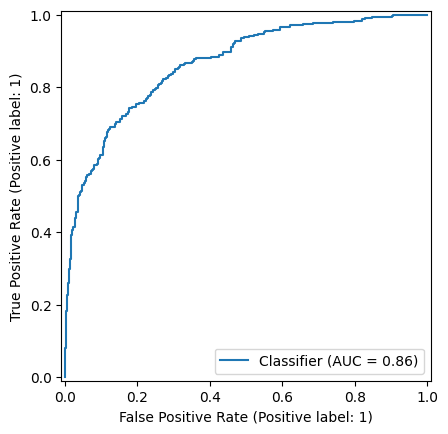

In [39]:
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba_best,
)

plt.savefig("./figures/RocCurve.png")

2.3.5.1. Сведение результатов

In [40]:
results = {
    "baseline": {
        "accuracy": accuracy_score(y_test, y_test_predict_baseline),
        "precision": precision_score(y_test, y_test_predict_baseline, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_test_proba_baseline),
    },
    "logreg": {
        "accuracy": accuracy_score(y_test, y_test_pred_best),
        "precision": precision_score(y_test, y_test_pred_best, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_test_proba_best),
    }
}

pd.DataFrame(results).T

,accuracy,precision,ROC-AUC
baseline,0.589333,0.000000,0.500000
logreg,0.797333,0.802326,0.864275


2.3.5.2. Краткий отчёт
Бейзлайн был менее точным, чем логистическая регрессия, никогда не предсказывал положительный класс, и не был лучше случайного распределения. В то же время логистическая регрессия угадывала в 80% случаев, и в 86% случаев ставила положительному объекту большую оценку. Точность выросла менее значительно, чем ROC-AUC, но и точность, и ROC-AUC выросли на значительные значения. Лучший результат логистической регрессии был при C равном 0.01. Для этой задачи модель логистической регресии выглядит разумнее, потому что по сравнению с нашим baseline логистическая регрессия в своём обучении использует признаки, что помогает верно отобразить структуру наших данных.